In [307]:
## import libraries
from wordcloud import WordCloud
from textblob import TextBlob
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')

In [308]:
#import data
name_df = pd.read_csv('names.csv')
name_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [309]:
#import data
review_df = pd.read_csv('reviews.csv')
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [310]:
review_df.drop(['Metadata','Pictures','Time'],1,inplace=True)

In [311]:
y = review_df.groupby('Restaurant')['Review']

In [312]:
df = pd.DataFrame(y)
df = df.join(name_df['Cost'])
df.columns=['name','review','cost']

In [313]:
#convert review to str 

df['review'] = df['review'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    100 non-null    object
 1   review  100 non-null    object
 2   cost    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [314]:
## cleaning reviews

def clntxt(text):
  text = str(text)
  text = re.sub(r'[0-9]+','',text)  #remove unnecessary numbers
  return text

# cleaning df['Review']
df['review'] = df['review'].apply(clntxt)
df.review

0         I've been to this place about two times an...
1         I didn't go and eat at the Dhaba.\nI had o...
2         We go their for a team dinner.The name of ...
3         It was excellent experience spiced thank K...
4         Service was pathetic. Ordered a sizzler wi...
                            ...                        
95        This place is highly recommended. It is wo...
96        It is at th floor of Act Boutique building...
97        My husband and I, visited Zega for their d...
98        The food is toooooooooo good. The interior...
99        I had ordered gobi methi paratha.. it was ...
Name: review, Length: 100, dtype: object

In [315]:
# remove commas from cost

def rm_commas(cost):
  cost = re.sub(r',','',cost)
  return cost

df['cost'] = df['cost'].apply(rm_commas)
df['cost'] = df['cost'].astype(int) #convert cost to int                   
df.head()

,name,review,cost
0,10 Downing Street,I've been to this place about two times an...,800
1,13 Dhaba,I didn't go and eat at the Dhaba.\nI had o...,800
2,"3B's - Buddies, Bar & Barbecue",We go their for a team dinner.The name of ...,1300
3,AB's - Absolute Barbecues,It was excellent experience spiced thank K...,800
4,Absolute Sizzlers,Service was pathetic. Ordered a sizzler wi...,1200


In [316]:
## Polarity and subjectivity

def polarity(txt):
  return TextBlob(txt).sentiment.polarity

def subjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

df['subjectivity'] = df['review'].apply(subjectivity)
df['polarity'] = df['review'].apply(polarity)

In [317]:
df

,name,review,cost,subjectivity,polarity
0,10 Downing Street,I've been to this place about two times an...,800,0.558730,0.390476
1,13 Dhaba,I didn't go and eat at the Dhaba.\nI had o...,800,0.678750,0.601250
2,"3B's - Buddies, Bar & Barbecue",We go their for a team dinner.The name of ...,1300,0.793000,0.664500
3,AB's - Absolute Barbecues,It was excellent experience spiced thank K...,800,0.826579,0.731579
4,Absolute Sizzlers,Service was pathetic. Ordered a sizzler wi...,1200,0.622778,0.359167
...,...,...,...,...,...
95,Urban Asia - Kitchen & Bar,This place is highly recommended. It is wo...,400,0.510476,0.158571
96,Yum Yum Tree - The Arabian Food Court,It is at th floor of Act Boutique building...,600,0.670649,0.061385
97,Zega - Sheraton Hyderabad Hotel,"My husband and I, visited Zega for their d...",1750,0.707778,0.559444
98,Zing's Northeast Kitchen,The food is toooooooooo good. The interior...,400,0.650000,0.422500


In [318]:
# find the sentiments

def sentiment(pol):
  sentiments = ''
  if pol<0:
    sentiments = 'Negative'
  elif pol == 0:
    sentiments = 'Neutral'
  else:
    sentiments = 'Positive'
  return sentiments

In [319]:
df['sentiments'] = df['polarity'].apply(sentiment)
df.sort_values('polarity').head()

,name,review,cost,subjectivity,polarity,sentiments
33,Faasos,"As part of tasting review, ordered masala ...",900,0.859524,-0.315714,Negative
29,Domino's Pizza,"I have ordered from Dominos all my life, b...",200,0.633636,-0.197603,Negative
39,Green Bawarchi Restaurant,Ordered food online. Horrible food. Full o...,700,0.759091,-0.195455,Negative
24,Delhi-39,"Went for lunch. Ordered Mix. Veg curry, Ro...",1400,0.670833,-0.154375,Negative
40,Hitech Bawarchi Food Zone,"Don't order Chicken Biryani Handi, they pr...",1200,0.722667,-0.091000,Negative


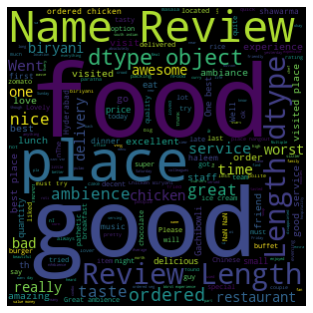

In [320]:
# create a text cloud

allwords = ' '.join(x for x in df['review'])
word_cloud = WordCloud(width=300,height=300,max_font_size=100).generate(allwords)

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [323]:
# percentage of positive & negative sentiments

pos_rev = df[df['sentiments']=='Positive']
neg_rev = df[df['sentiments']=='Negative']

# find the ratio
pos_rev = round(pos_rev.shape[0]/df.shape[0] *100,1)
neg_rev = round(neg_rev.shape[0]/df.shape[0] *100,1)

print('Postive reviews : {} %'.format(pos_rev))
print('negative reviews : {} %'.format(neg_rev))

Postive reviews : 89.0 %
negative reviews : 11.0 %


# Visualization

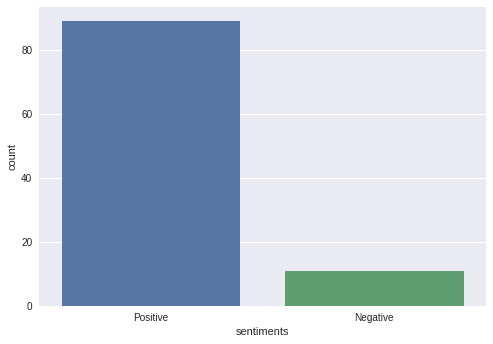

In [322]:
sns.countplot(df['sentiments'])

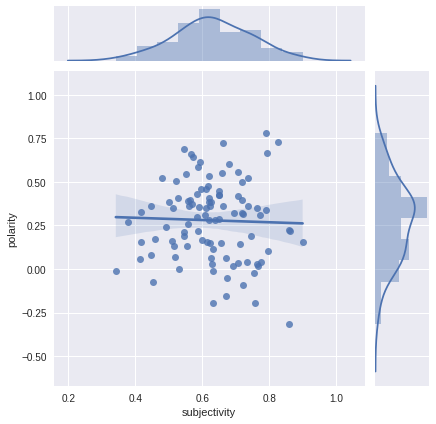

In [328]:
sns.jointplot(x='subjectivity',y='polarity',data=df,kind='reg')

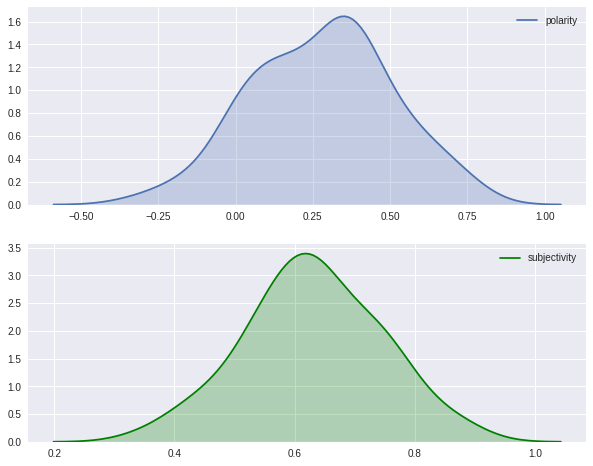

In [333]:
fig,ax = plt.subplots(2,figsize=(10,8))
sns.kdeplot(df['polarity'],shade=True,ax=ax[0])
sns.kdeplot(df['subjectivity'],shade=True,ax=ax[1],color='green')
plt.show()

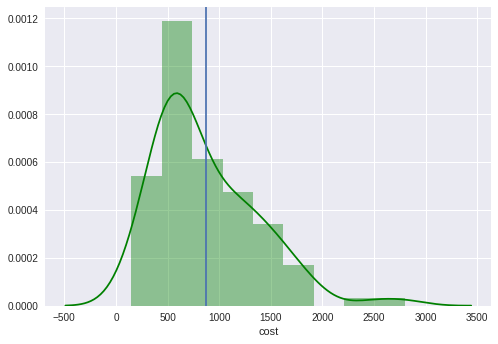

In [326]:
sns.distplot(df['cost'],color='green')
plt.axvline(df.cost.mean())

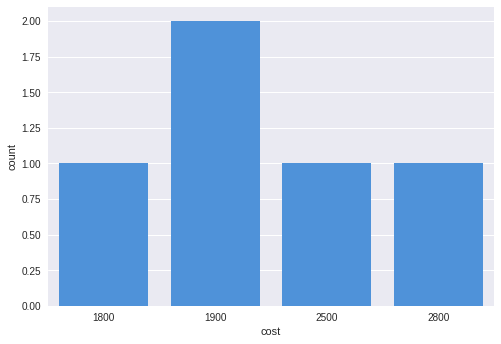

In [350]:
# number of people in top 5 expensive restaurants
top_5_costs = df.sort_values('cost',ascending=False).head(5)
sns.countplot(top_5_costs['cost'],color='#3891f0')